In [1]:
# Parameters
working_dir = "/nfs/team205/heart/Vitro/TF_selection"
path_to_adata_gex_dir = "/nfs/team205/heart/anndata_objects/Vitro/post_multiVI_full-features"
group_key = "t_binned"
group_a = "t3"
group_b = "t1"
time_key = "t"
subset_object = False
geneset_list = ["MSigDB_Hallmark_2020", "KEGG_2021_Human", "GO_Biological_Process_2023"]

path_to_eRegulon_signatures_gene = "/nfs/team205/heart/pyscenic/plus/eRegulon_signatures/vCM_onlyLeft_Gene_eRegulon_signatures.pkl"
path_to_eRegulon_signatures_region = "/nfs/team205/heart/pyscenic/plus/eRegulon_signatures/vCM_onlyLeft_Region_eRegulon_signatures.pkl"

In [38]:
import scanpy as sc
import pandas as pd
import numpy as np
import anndata

import matplotlib.pyplot as plt
import matplotlib as mpl
# enables correct plotting of text
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42 
import seaborn as sns

In [3]:
import session_info
session_info.show()

In [6]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location("module.name", "/nfs/team205/kk18/function/python/utils.py")
utils = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = utils
spec.loader.exec_module(utils)

In [7]:
sc.settings.set_figure_params(dpi=80,dpi_save=300)

In [8]:
figdir = '/nfs/team205/heart/fetal_ms_figures/raw_plots_kk'

# Function

# Read in adata

In [9]:
path_to_adata_gex_dir

'/nfs/team205/heart/anndata_objects/Vitro/post_multiVI_full-features'

In [10]:
adata_compact = sc.read_h5ad(f'{path_to_adata_gex_dir}/Foetal_vCM_Left-compact_rna.h5ad')
# filter and log normalise
# filter
sc.pp.filter_genes(adata_compact, min_cells=3)

# log normalise
sc.pp.normalize_total(adata_compact, target_sum=1e4)
sc.pp.log1p(adata_compact)
print(adata_compact.X.data[:10])

adata_trab = sc.read_h5ad(f'{path_to_adata_gex_dir}/Foetal_vCM_Left-trabeculated_rna.h5ad')
# filter and log normalise
# filter
sc.pp.filter_genes(adata_trab, min_cells=3)

# log normalise
sc.pp.normalize_total(adata_trab, target_sum=1e4)
sc.pp.log1p(adata_trab)
print(adata_trab.X.data[:10])

[1.0619993 1.5653387 1.8985853 1.5653387 2.3476288 1.8985853 1.5653387
 1.0619993 1.0619993 1.0619993]
[1.0934392 1.0934392 1.0934392 1.603227  1.0934392 1.0934392 1.0934392
 1.603227  1.0934392 1.603227 ]


/nfs/team205/kk18/miniconda3/envs/vitro/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


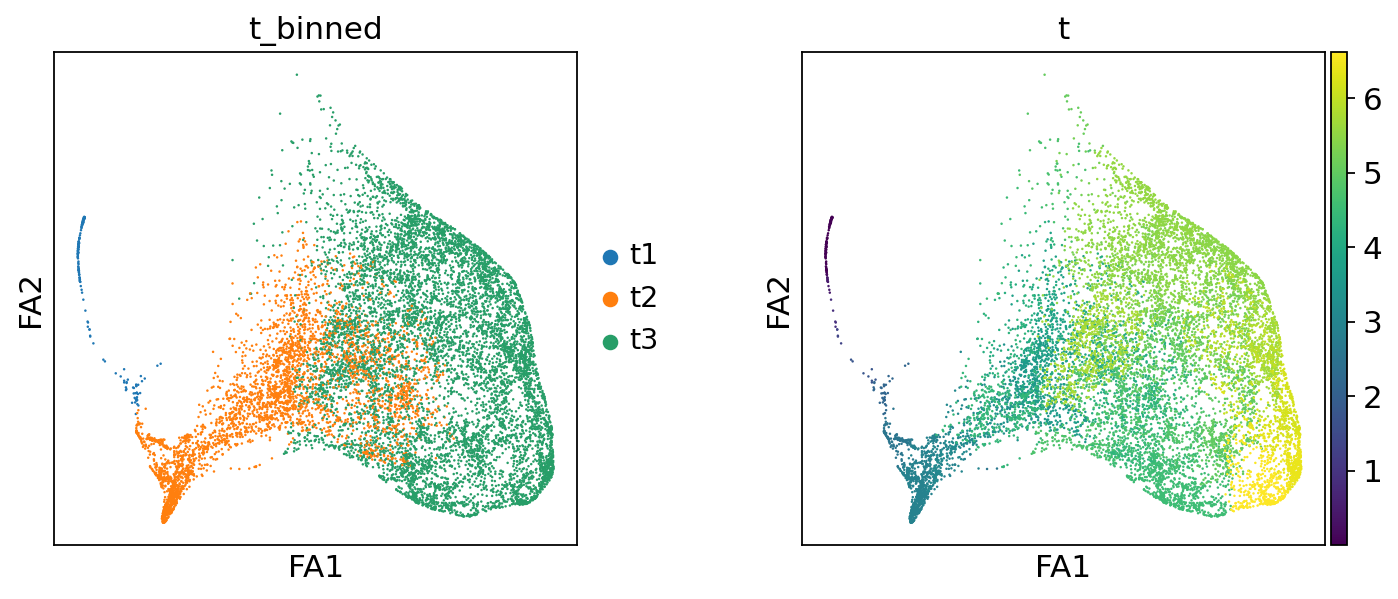

In [11]:
sc.pl.draw_graph(adata_compact, color=[group_key, time_key], size=5, wspace=0.3, ncols=3)

/nfs/team205/kk18/miniconda3/envs/vitro/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


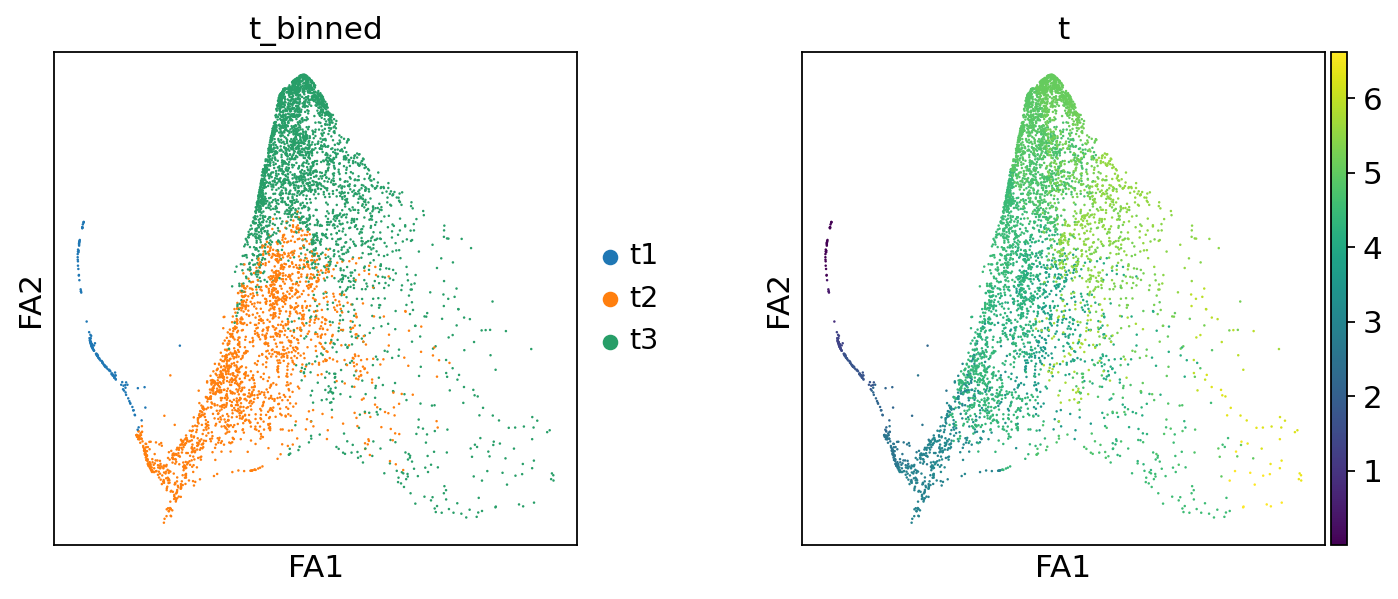

In [12]:
sc.pl.draw_graph(adata_trab, color=[group_key, time_key], size=5, wspace=0.3, ncols=3)

In [13]:
# whole data
adata_all = sc.read_h5ad('/nfs/team205/heart/anndata_objects/Foetal/vCM/post_scFate/foetal_vCM_onlyLeft.h5ad')

# subset gene expression data
adata_all = adata_all[:,adata_all.var['modality']=='Gene Expression']

# filter and log-normalise
sc.pp.filter_genes(adata_all, min_cells=3)
sc.pp.normalize_total(adata_all, target_sum=1e4)
sc.pp.log1p(adata_all)

print(adata_all.X.data[:10])
adata_all

/nfs/team205/kk18/miniconda3/envs/vitro/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


[1.0619993 1.5653387 1.8985853 1.5653387 2.3476288 1.8985853 1.5653387
 1.0619993 1.0619993 1.0619993]


AnnData object with n_obs × n_vars = 16451 × 26187
    obs: 'sangerID', 'combinedID', 'donor', 'region', 'age', 'sex', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'week', 'trimester', 'cycling', 'S_score', 'G2M_score', 'phase', 'fine_grain', 'mid_grain', 'coarse_grain', 'batch_key', 'total_counts', 'total_counts_mt', 'total_counts_ribo', 'n_genes_by_counts', 'pct_counts_mt', 'pct_counts_ribo', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'log1p_total_counts_ribo', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', '_indices', '_scvi_batch', '_scvi_labels', 'leiden_MultiVI', 't', 'seg', 'edge', 'milestones', 'age_days', 'week_cont'
    var: 'modality', 'gene_name_scRNA-0', 'gene_id', 'seqnames', 'start', 'end', 'width', 'strand', 'score', 'replicateScoreQuantile', 'groupScoreQuantile', 'Reproducibility', 'GroupReplicate', 'distToGeneStart', 'nearestGene', 'peakType', 'distToTSS', 'nearestTSS', 'GC', 'idx', 'N', 'n_cells'
    uns: '_scvi_manager_uu

In [14]:
adata_all.obs.fine_grain.value_counts()

VentricularCardiomyocytesLeftCompact         11397
VentricularCardiomyocytesLeftTrabeculated     5054
Name: fine_grain, dtype: int64

# DEG analysis: compact-vs-trab at the end stage

In [15]:
logFC_threshold = 0.5

In [16]:
# make new label for the testing: combining fine_grain and t_binned
## for each compact and trabeculated
adata_compact.obs['fine_grain_time'] = adata_compact.obs['fine_grain'].astype('str')+'_'+adata_compact.obs['t_binned'].astype('str')
adata_trab.obs['fine_grain_time'] = adata_trab.obs['fine_grain'].astype('str')+'_'+adata_trab.obs['t_binned'].astype('str')

## add to the whold anndata
adata_all.obs['fine_grain_time'] = np.nan
adata_all.obs.loc[adata_compact.obs_names,'fine_grain_time'] = adata_compact.obs['fine_grain_time'].copy()
adata_all.obs.loc[adata_trab.obs_names,'fine_grain_time'] = adata_trab.obs['fine_grain_time'].copy()

# checking all cells has a label
all(adata_all.obs['fine_grain_time'].isna()==False)

True

In [17]:
# compact, up
compact_deg_up = utils.rank_genes_groups_with_mean(adata_all,
                                  groupby='fine_grain_time',
                                  groups=['VentricularCardiomyocytesLeftCompact_t3'],
                                  reference='VentricularCardiomyocytesLeftTrabeculated_t3',
                                  method='t-test',
                                  log2fc_min=logFC_threshold ## thresholdng for UP
                                 )
compact_deg_up = compact_deg_up.sort_values('scores',ascending=False)
compact_deg_up[:20]

,names,scores,logfoldchanges,pvals,pvals_adj,group,group_mean
0,RABGAP1L,55.565960,2.160214,0.000000e+00,0.000000e+00,VentricularCardiomyocytesLeftCompact_t3,2.629227
1,HEY2,49.787338,2.728238,0.000000e+00,0.000000e+00,VentricularCardiomyocytesLeftCompact_t3,0.819707
2,KIDINS220,37.268436,1.127507,1.014637e-266,1.398436e-263,VentricularCardiomyocytesLeftCompact_t3,2.757069
3,LINC02248,36.904350,2.163144,1.773461e-276,2.902601e-273,VentricularCardiomyocytesLeftCompact_t3,0.908971
4,ERBB4,35.936058,1.160451,2.794016e-248,3.181169e-245,VentricularCardiomyocytesLeftCompact_t3,3.301770
5,TBX20,32.526592,1.181308,9.538245e-211,8.325934e-208,VentricularCardiomyocytesLeftCompact_t3,2.326730
6,MBOAT2,32.383972,1.476477,6.938016e-214,6.265028e-211,VentricularCardiomyocytesLeftCompact_t3,1.381991
7,MYL7,30.416658,1.022387,1.703678e-185,1.205790e-182,VentricularCardiomyocytesLeftCompact_t3,3.188598
8,VIM,29.925409,1.366336,5.300147e-185,3.652499e-182,VentricularCardiomyocytesLeftCompact_t3,1.112899
9,MYH7,28.629637,1.038137,1.021539e-166,6.369298e-164,VentricularCardiomyocytesLeftCompact_t3,3.473003


In [18]:
# compact, down
compact_deg_down = utils.rank_genes_groups_with_mean(adata_all,
                                  groupby='fine_grain_time',
                                  groups=['VentricularCardiomyocytesLeftCompact_t3'],
                                  reference='VentricularCardiomyocytesLeftTrabeculated_t3',
                                  method='t-test',
                                  log2fc_max = -logFC_threshold ## thresholdng for DOWN
                                 )
compact_deg_down = compact_deg_down.sort_values('scores',ascending=True)
compact_deg_down[:20]

,names,scores,logfoldchanges,pvals,pvals_adj,group,group_mean
1499,CSMD1,-80.434181,-4.617880,0.000000e+00,0.000000e+00,VentricularCardiomyocytesLeftCompact_t3,0.399960
1498,BRINP3,-70.955376,-3.899265,0.000000e+00,0.000000e+00,VentricularCardiomyocytesLeftCompact_t3,0.340121
1497,MYOM2,-58.230450,-3.775315,0.000000e+00,0.000000e+00,VentricularCardiomyocytesLeftCompact_t3,0.210887
1496,ADAMTSL1,-49.203285,-2.347138,0.000000e+00,0.000000e+00,VentricularCardiomyocytesLeftCompact_t3,0.541733
1495,SGCD,-48.893906,-2.828265,0.000000e+00,0.000000e+00,VentricularCardiomyocytesLeftCompact_t3,0.423396
1494,SPOCK1,-48.827213,-4.473753,0.000000e+00,0.000000e+00,VentricularCardiomyocytesLeftCompact_t3,0.092307
1493,OPCML,-46.359600,-5.145081,0.000000e+00,0.000000e+00,VentricularCardiomyocytesLeftCompact_t3,0.059216
1492,CRNDE,-45.722321,-3.044971,0.000000e+00,0.000000e+00,VentricularCardiomyocytesLeftCompact_t3,0.174190
1491,PLEKHA5,-43.885868,-1.404255,0.000000e+00,0.000000e+00,VentricularCardiomyocytesLeftCompact_t3,1.776713
1490,LINC02208,-43.851723,-3.220714,0.000000e+00,0.000000e+00,VentricularCardiomyocytesLeftCompact_t3,0.294644


In [19]:
# trabeculated, up
trab_deg_up = utils.rank_genes_groups_with_mean(adata_all,
                                  groupby='fine_grain_time',
                                  groups=['VentricularCardiomyocytesLeftTrabeculated_t3'],
                                  reference='VentricularCardiomyocytesLeftCompact_t3',
                                  method='t-test',
                                  log2fc_min=logFC_threshold ## thresholdng for UP
                                 )
trab_deg_up = trab_deg_up.sort_values('scores',ascending=False)
trab_deg_up[:20]

,names,scores,logfoldchanges,pvals,pvals_adj,group,group_mean
0,CSMD1,80.434181,4.617880,0.000000e+00,0.000000e+00,VentricularCardiomyocytesLeftTrabeculated_t3,2.570681
1,BRINP3,70.955376,3.899265,0.000000e+00,0.000000e+00,VentricularCardiomyocytesLeftTrabeculated_t3,1.952278
2,MYOM2,58.230450,3.775315,0.000000e+00,0.000000e+00,VentricularCardiomyocytesLeftTrabeculated_t3,1.438561
3,ADAMTSL1,49.203285,2.347138,0.000000e+00,0.000000e+00,VentricularCardiomyocytesLeftTrabeculated_t3,1.538648
4,SGCD,48.893906,2.828265,0.000000e+00,0.000000e+00,VentricularCardiomyocytesLeftTrabeculated_t3,1.556848
5,SPOCK1,48.827213,4.473753,0.000000e+00,0.000000e+00,VentricularCardiomyocytesLeftTrabeculated_t3,1.146974
6,OPCML,46.359600,5.145081,0.000000e+00,0.000000e+00,VentricularCardiomyocytesLeftTrabeculated_t3,1.150148
7,CRNDE,45.722321,3.044971,0.000000e+00,0.000000e+00,VentricularCardiomyocytesLeftTrabeculated_t3,0.944082
8,PLEKHA5,43.885868,1.404255,0.000000e+00,0.000000e+00,VentricularCardiomyocytesLeftTrabeculated_t3,2.638835
9,LINC02208,43.851723,3.220714,0.000000e+00,0.000000e+00,VentricularCardiomyocytesLeftTrabeculated_t3,1.433735


In [20]:
# trabeculated, down
trab_deg_down = utils.rank_genes_groups_with_mean(adata_all,
                                  groupby='fine_grain_time',
                                  groups=['VentricularCardiomyocytesLeftTrabeculated_t3'],
                                  reference='VentricularCardiomyocytesLeftCompact_t3',
                                  method='t-test',
                                  log2fc_max = -logFC_threshold ## thresholdng for DOWN
                                 )
trab_deg_down = trab_deg_down.sort_values('scores',ascending=True)
trab_deg_down[:20]

,names,scores,logfoldchanges,pvals,pvals_adj,group,group_mean
1353,RABGAP1L,-55.565960,-2.160214,0.000000e+00,0.000000e+00,VentricularCardiomyocytesLeftTrabeculated_t3,1.355258
1352,HEY2,-49.787338,-2.728238,0.000000e+00,0.000000e+00,VentricularCardiomyocytesLeftTrabeculated_t3,0.175323
1351,KIDINS220,-37.268436,-1.127507,1.014637e-266,1.398436e-263,VentricularCardiomyocytesLeftTrabeculated_t3,2.048056
1350,LINC02248,-36.904350,-2.163144,1.773461e-276,2.902601e-273,VentricularCardiomyocytesLeftTrabeculated_t3,0.285805
1349,ERBB4,-35.936058,-1.160451,2.794016e-248,3.181169e-245,VentricularCardiomyocytesLeftTrabeculated_t3,2.541883
1348,TBX20,-32.526592,-1.181308,9.538245e-211,8.325934e-208,VentricularCardiomyocytesLeftTrabeculated_t3,1.624588
1347,MBOAT2,-32.383972,-1.476477,6.938016e-214,6.265028e-211,VentricularCardiomyocytesLeftTrabeculated_t3,0.728477
1346,MYL7,-30.416658,-1.022387,1.703678e-185,1.205790e-182,VentricularCardiomyocytesLeftTrabeculated_t3,2.521573
1345,VIM,-29.925409,-1.366336,5.300147e-185,3.652499e-182,VentricularCardiomyocytesLeftTrabeculated_t3,0.583608
1344,MYH7,-28.629637,-1.038137,1.021539e-166,6.369298e-164,VentricularCardiomyocytesLeftTrabeculated_t3,2.785584


# Read in associated genes

In [21]:
fit_res_compact = pd.read_csv(f'{working_dir}/foetal_vCM_left-compact/outs/Fitting_{time_key}_Gene.csv',index_col=0)
fit_res_trab = pd.read_csv(f'{working_dir}/foetal_vCM_left-trabeculated/outs/Fitting_{time_key}_Gene.csv',index_col=0)

In [22]:
fit_res_compact.loc['SLC27A1']

p_val                       0.0
A                      0.350825
fdr                         0.0
st                            0
signi                     False
activator_repressor     SLC27A1
Name: SLC27A1, dtype: object

In [23]:
fit_res_trab.loc['SLC27A1']

p_val                   0.00005
A                      0.967977
fdr                         1.0
st                            0
signi                     False
activator_repressor     SLC27A1
Name: SLC27A1, dtype: object

# Select associated genes which were highest in the group_a or group_b

**i.e. separating into UP or DOWN regulated genes**

In [24]:
# compact
group_mean_compact = utils.grouped_obs_mean(adata_compact,group_key=group_key)

# select upregulated (a>b) or downregulated (b>a) genes
group_a_genes_compact = list(group_mean_compact.index[group_mean_compact[group_a] > group_mean_compact[group_b]])
group_b_genes_compact = list(group_mean_compact.index[group_mean_compact[group_b] > group_mean_compact[group_a]])

group_mean_compact.head()

,t1,t2,t3
AL627309.1,0.000000,0.000337,0.003509
AL627309.5,0.008979,0.009128,0.021682
AL669831.2,0.000000,0.000000,0.000352
LINC01409,0.073663,0.040193,0.024169
LINC01128,0.212651,0.317540,0.548848


In [25]:
group_mean_compact.loc['SLC27A1']

t1    0.054584
t2    0.130589
t3    0.216747
Name: SLC27A1, dtype: float64

In [26]:
# trabeculated
group_mean_trab = utils.grouped_obs_mean(adata_trab,group_key=group_key)

# select upregulated (a>b) or downregulated (b>a) genes
group_a_genes_trab = list(group_mean_trab.index[group_mean_trab[group_a] > group_mean_trab[group_b]])
group_b_genes_trab = list(group_mean_trab.index[group_mean_trab[group_b] > group_mean_trab[group_a]])

group_mean_trab.head()

,t1,t2,t3
AL627309.1,0.000000,0.005353,0.003083
AL627309.5,0.002833,0.010828,0.018328
LINC01409,0.092451,0.025328,0.024927
LINC01128,0.142047,0.355418,0.495542
LINC00115,0.010075,0.011202,0.014365


In [34]:
group_mean_trab.loc['SLC27A1']

t1    0.025651
t2    0.154269
t3    0.204383
Name: SLC27A1, dtype: float64

# Associated genes

In [27]:
fit_fdr_threshold = 0.05
fit_A_threshold = 0.5

In [28]:
# compact
fit_res_sel_compact = fit_res_compact[(fit_res_compact['fdr']<fit_fdr_threshold)&\
                                      (fit_res_compact['A']>fit_A_threshold)
                                     ]
# group a, upregulated
shared = list(set(fit_res_sel_compact.index).intersection(group_a_genes_compact))
fit_res_sel_up2a_compact = fit_res_sel_compact.loc[shared]
fit_res_sel_up2a_compact = fit_res_sel_up2a_compact.sort_values('A',ascending=False)
print(f'up towards {group_a}, number of fitted genes: {len(fit_res_sel_up2a_compact)}')
# group b, downregulated
shared = list(set(fit_res_sel_compact.index).intersection(group_b_genes_compact))
fit_res_sel_up2b_compact = fit_res_sel_compact.loc[shared]
fit_res_sel_up2b_compact = fit_res_sel_up2b_compact.sort_values('A',ascending=False)
print(f'up towards {group_b}, number of fitted genes: {len(fit_res_sel_up2b_compact)}')

up towards t3, number of fitted genes: 1073
up towards t1, number of fitted genes: 2176


In [29]:
# trabeculated
fit_res_sel_trab = fit_res_trab[(fit_res_trab['fdr']<fit_fdr_threshold)&\
                                (fit_res_trab['A']>fit_A_threshold)
                                     ]
# group a, upregulated
shared = list(set(fit_res_sel_trab.index).intersection(group_a_genes_trab))
fit_res_sel_up2a_trab = fit_res_sel_trab.loc[shared]
fit_res_sel_up2a_trab = fit_res_sel_up2a_trab.sort_values('A',ascending=False)
print(f'up towards {group_a}, number of fitted genes: {len(fit_res_sel_up2a_trab)}')
# group b, downregulated
shared = list(set(fit_res_sel_trab.index).intersection(group_b_genes_trab))
fit_res_sel_up2b_trab = fit_res_sel_trab.loc[shared]
fit_res_sel_up2b_trab = fit_res_sel_up2b_trab.sort_values('A',ascending=False)
print(f'up towards {group_b}, number of fitted genes: {len(fit_res_sel_up2b_trab)}')

up towards t3, number of fitted genes: 893
up towards t1, number of fitted genes: 1972


In [30]:
fit_res_sel_up2a_compact.loc['PRDM16']

p_val                       0.0
A                      1.618132
fdr                         0.0
st                            1
signi                      True
activator_repressor      PRDM16
Name: PRDM16, dtype: object

In [31]:
fit_res_sel_up2a_trab.loc['PRDM16']

p_val                      0.0
A                      1.63836
fdr                        0.0
st                           1
signi                     True
activator_repressor     PRDM16
Name: PRDM16, dtype: object

# Select specific and common ones

UPregulated ones
* Specific features: associated with and UP-regulated along the pseudotime **AND** compact-vs-trab DEGs (compact>trab or trab>compact)
* Common features: associated with and UP-regulated along both pseudotime (intersection) **AND** not compact-vs-trab DEGs

DOWNregulated ones
* Specific features: associated with and DOWN-regulated along the pseudotime **AND** compact-vs-trab DEGs (compact<trab or trab<compact)
* Common features: associated with and DOWN-regulated along both pseudotime (intersection) **AND** not compact-vs-trab DEGs

In [32]:
# up toward group a, up-regulated
compact_spec_up2a_genes = list(set(fit_res_sel_up2a_compact.index).intersection(list(compact_deg_up['names'])))
trab_spec_up2a_genes = list(set(fit_res_sel_up2a_trab.index).intersection(list(trab_deg_up['names'])))
common_up2a_genes = list(set(fit_res_sel_up2a_compact.index).intersection(fit_res_sel_up2a_trab.index))
common_up2a_genes = list(set(common_up2a_genes)-set(compact_deg_up['names'])-set(trab_deg_up['names'])) ### removing DEGs
print(f'up toward {group_a}')
print(len(compact_spec_up2a_genes))
print(len(trab_spec_up2a_genes))
print(len(common_up2a_genes))

# up toward group b, down-regulated
compact_spec_up2b_genes = list(set(fit_res_sel_up2b_compact.index).intersection(list(compact_deg_down['names'])))
trab_spec_up2b_genes = list(set(fit_res_sel_up2b_trab.index).intersection(list(trab_deg_down['names'])))
common_up2b_genes = list(set(fit_res_sel_up2b_compact.index).intersection(fit_res_sel_up2b_trab.index))
common_up2b_genes = list(set(common_up2b_genes)-set(compact_deg_down['names'])-set(trab_deg_down['names'])) ### removing DEGs
print(f'up toward {group_b}')
print(len(compact_spec_up2b_genes))
print(len(trab_spec_up2b_genes))
print(len(common_up2b_genes))

up toward t3
130
107
336
up toward t1
185
384
738


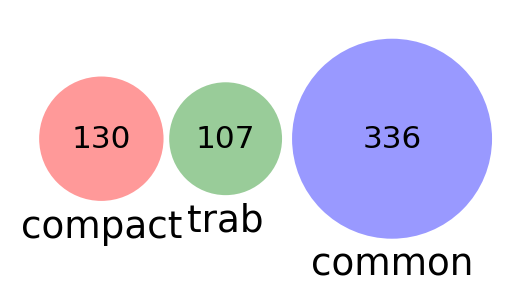

In [33]:
# venn diagram for upregulated genes
# just checking there is no overlap
from matplotlib_venn import venn3
venn3((set(compact_spec_up2a_genes),set(trab_spec_up2a_genes),set(common_up2a_genes)),
      set_labels=('compact', 'trab', 'common')
     )

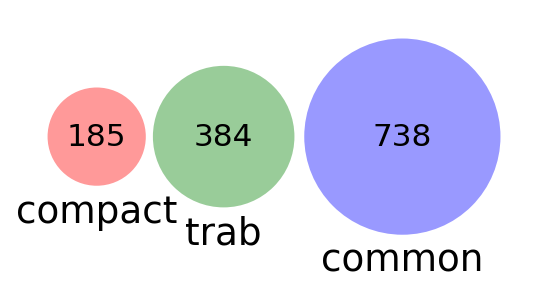

In [34]:
# venn diagram for downregulated genes
# just checking there is no overlap
from matplotlib_venn import venn3
venn3((set(compact_spec_up2b_genes),set(trab_spec_up2b_genes),set(common_up2b_genes)),
      set_labels=('compact', 'trab', 'common')
     )

# Save the genes

In [40]:
gene_signatures = {}
# up, towards group_a
gene_signatures['compact_specific_up'] = compact_spec_up2a_genes
gene_signatures['trab_specific_up'] = trab_spec_up2a_genes
gene_signatures['common_up'] = common_up2a_genes

# down, towards group_b
gene_signatures['compact_specific_down'] = compact_spec_up2b_genes
gene_signatures['trab_specific_down'] = trab_spec_up2b_genes
gene_signatures['common_down'] = common_up2b_genes

print(gene_signatures.keys())

# save
utils.save_pkl(gene_signatures,
           file = f'{working_dir}/foetal_vCM_left_compact-vs-trabeculated_downstream/gene_signatures.pkl'
          )

dict_keys(['compact_specific_up', 'trab_specific_up', 'common_up', 'compact_specific_down', 'trab_specific_down', 'common_down'])


In [41]:
f'{working_dir}/foetal_vCM_left_compact-vs-trabeculated_downstream/gene_signatures.pkl'

'/nfs/team205/heart/Vitro/TF_selection/foetal_vCM_left_compact-vs-trabeculated_downstream/gene_signatures.pkl'

# Scoring and plot

In [35]:
adata_all.X.data[:10]

array([1.0619993, 1.5653387, 1.8985853, 1.5653387, 2.3476288, 1.8985853,
       1.5653387, 1.0619993, 1.0619993, 1.0619993], dtype=float32)

/nfs/team205/kk18/miniconda3/envs/vitro/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


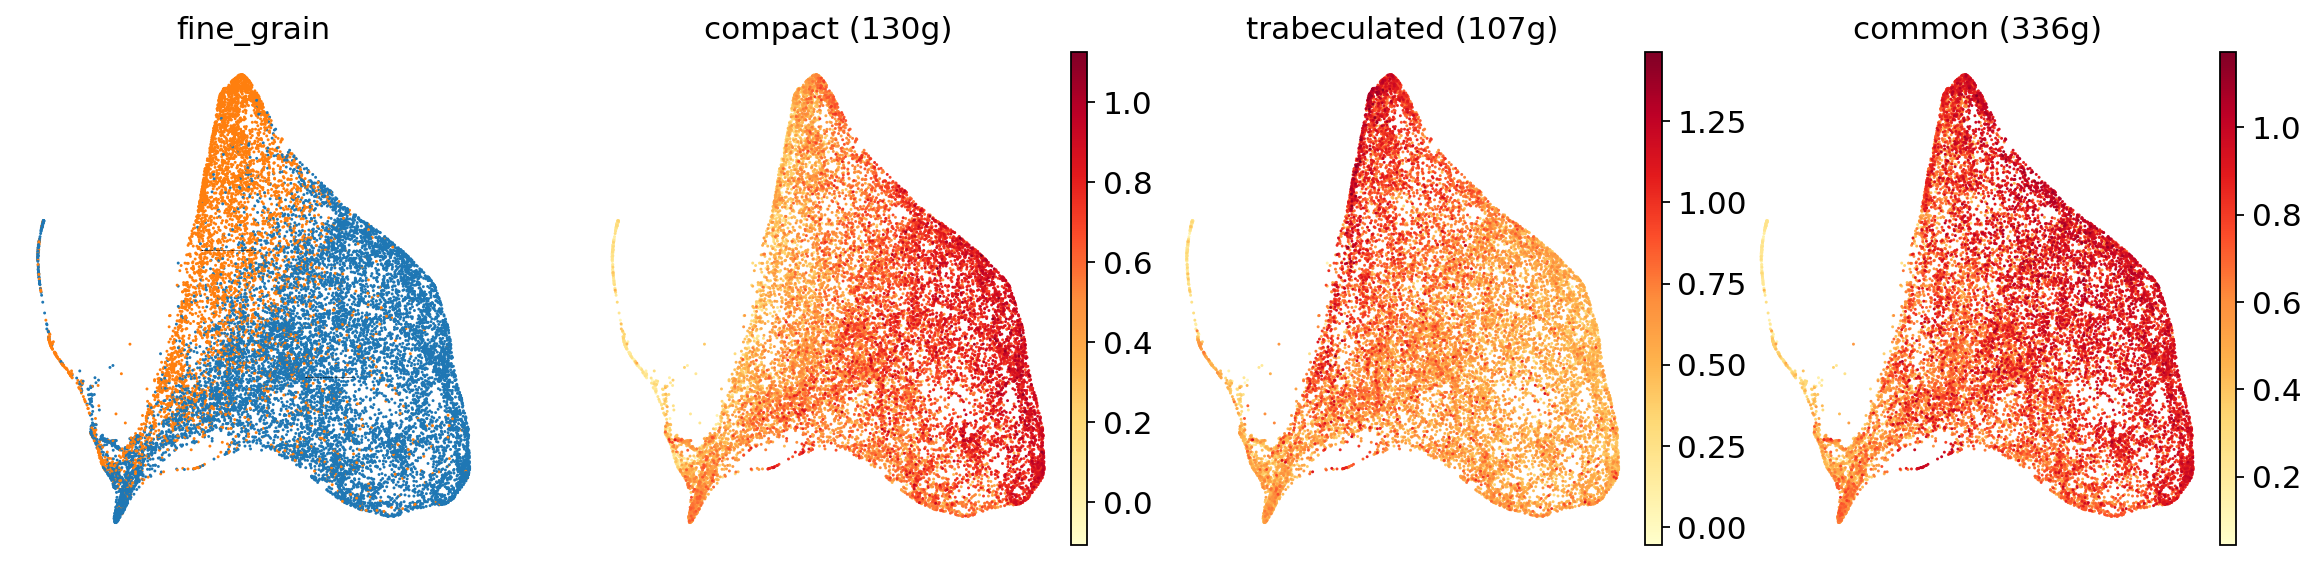

In [39]:
# upregulated
sc.tl.score_genes(adata_all,compact_spec_up2a_genes,score_name=f'compact ({len(compact_spec_up2a_genes)}g)')
sc.tl.score_genes(adata_all,trab_spec_up2a_genes,score_name=f'trabeculated ({len(trab_spec_up2a_genes)}g)')
sc.tl.score_genes(adata_all,common_up2a_genes,score_name=f'common ({len(common_up2a_genes)}g)')

sc.pl.draw_graph(adata_all, color=['fine_grain',
                                   f'compact ({len(compact_spec_up2a_genes)}g)',
                                   f'trabeculated ({len(trab_spec_up2a_genes)}g)',
                                   f'common ({len(common_up2a_genes)}g)',
                                  ], 
                 frameon=False, legend_loc='on data',legend_fontsize=0,
                 size=7, wspace=0.1, ncols=4, cmap='YlOrRd',show=False)
plt.savefig(f"{figdir}/vCMs-left_force-directed_gene-signatures-upregulated.pdf", bbox_inches="tight",dpi=300)

/nfs/team205/kk18/miniconda3/envs/vitro/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


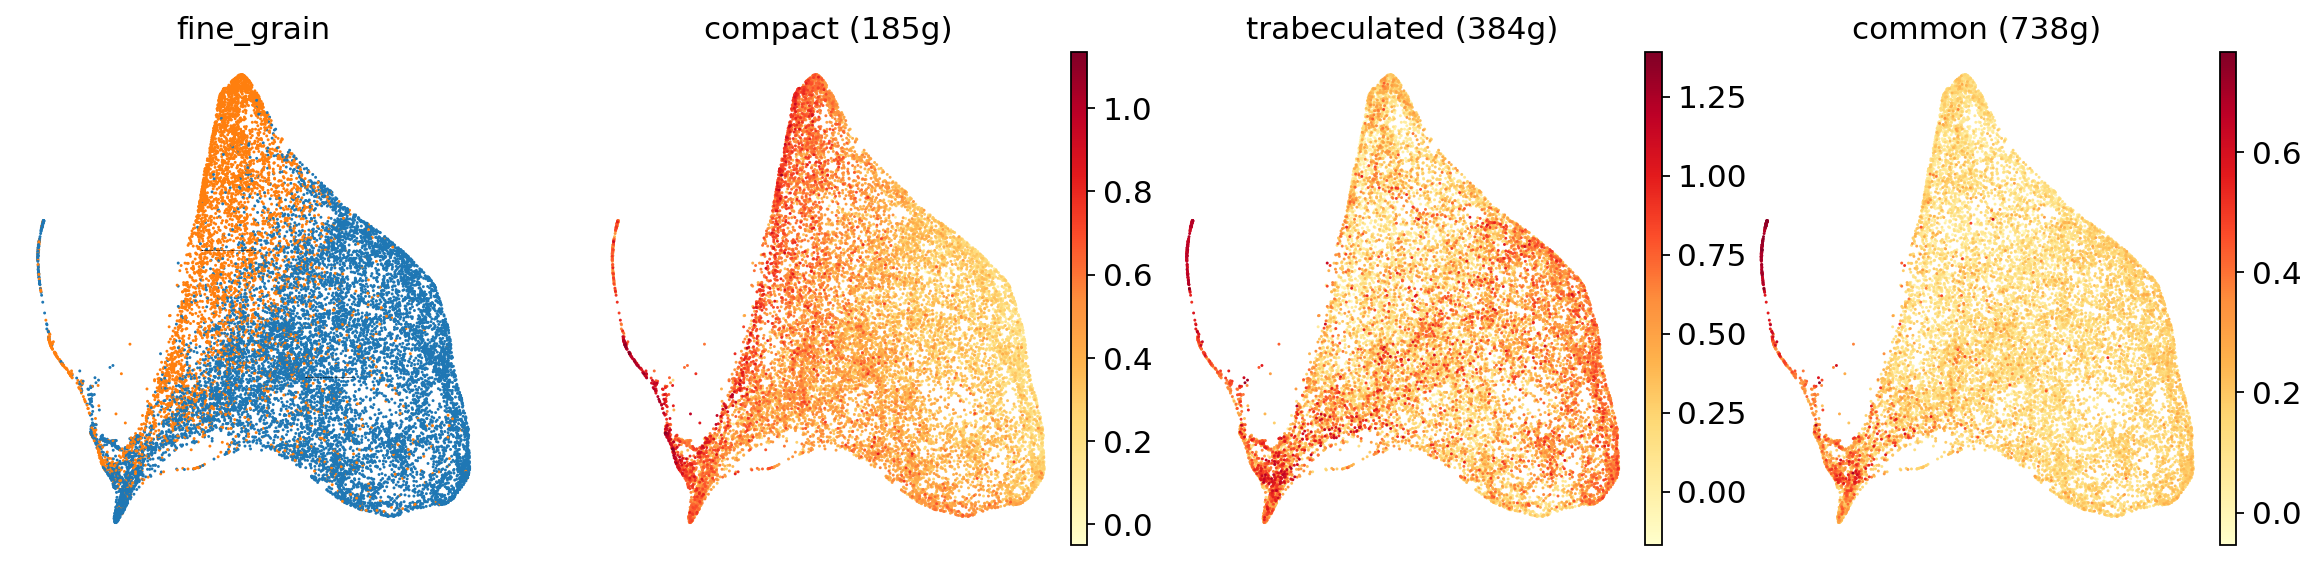

In [41]:
# downregulated
sc.tl.score_genes(adata_all,compact_spec_up2b_genes,score_name=f'compact ({len(compact_spec_up2b_genes)}g)')
sc.tl.score_genes(adata_all,trab_spec_up2b_genes,score_name=f'trabeculated ({len(trab_spec_up2b_genes)}g)')
sc.tl.score_genes(adata_all,common_up2b_genes,score_name=f'common ({len(common_up2b_genes)}g)')

sc.pl.draw_graph(adata_all, color=['fine_grain',
                                   f'compact ({len(compact_spec_up2b_genes)}g)',
                                   f'trabeculated ({len(trab_spec_up2b_genes)}g)',
                                   f'common ({len(common_up2b_genes)}g)',
                                  ], 
                 frameon=False, legend_loc='on data',legend_fontsize=0,
                 size=7, wspace=0.1, ncols=4, cmap='YlOrRd',show=False)
plt.savefig(f"{figdir}/vCMs-left_force-directed_gene-signatures-downregulated.pdf", bbox_inches="tight",dpi=300)